# 7. 택배시스템 최적화

- 비지도 학습과 군집의 개념을 이해한다. 
- 군집를 이용한 머신러닝 알고리즘 중 k-Means에 대해 이해한다. 
- 모델 제작을 통해 지도 학습과 비지도 학습의 문제 해결 방법의 차이를 이해한다. 




###군집과 K-means란?

- 비지도 학습 : 문제는 알려주되 정답(레이블)은 알려주지 않음 
(여러 데이터를 학습함으로써 미처 알지 못했던 것을 발견하는 데 목적)
- 군집 : 유사도가 높은 집단끼리 그룹을 만들고 분류된 그룹 간 특징을 파악하는 분석 방법 
- K-means : 군집의 개수를 정하는 알고리즘 (가장 많이 사용)


###데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 택배 위치 데이터 가져오기
- Pandas read_csv( ) 함수를 이용해 택배 위치 데이터 호출
- 371개의 일련번호, 위도(Latitude), 경도(Longitude) 위치가 있는 인천 연안의 택배 위치 데이터


In [ ]:
url = 'https://drive.google.com/file/d/1yq6aIqR3sUd1MLrWCTwPDpS6pBFlxpPl/view?usp=sharing'
df = pd.read_csv('https://drive.google.com/uc?export=download&id='+url[32:65], delimiter=',')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Num        371 non-null    int64  
 1   Latitude   371 non-null    float64
 2   Longitude  371 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


In [ ]:
df

,Num,Latitude,Longitude
0,1,37.336803,126.712836
1,2,37.501303,126.787808
2,3,37.522501,126.777363
3,4,37.511178,126.743209
4,5,37.508776,126.738469
...,...,...,...
366,367,37.299009,126.833047
367,368,37.524540,126.622279
368,369,37.491371,126.678090
369,370,37.527372,126.623457


넘파이 배열로 만들고 의미 없는 일련번호를 뺀 위도와 경도만 불러와 X에 저장

In [ ]:
XY = np.array(df)
X = XY[: , 1:]

In [ ]:
X

array([[ 37.336803, 126.712836],
       [ 37.501303, 126.787808],
       [ 37.522501, 126.777363],
       [ 37.511178, 126.743209],
       [ 37.508776, 126.738469],
       [ 37.528486, 126.741476],
       [ 37.510999, 126.778994],
       [ 37.529438, 126.742163],
       [ 37.516358, 126.734111],
       [ 37.513337, 126.734624],
       [ 37.486048, 126.802279],
       [ 37.459113, 126.710721],
       [ 37.499841, 126.7556  ],
       [ 37.418995, 126.696642],
       [ 37.546478, 126.735785],
       [ 37.487669, 126.672357],
       [ 37.512916, 126.730888],
       [ 37.451826, 126.709252],
       [ 37.533946, 126.722867],
       [ 37.4491  , 126.736595],
       [ 37.416896, 126.703476],
       [ 37.487152, 126.8096  ],
       [ 37.492951, 126.755608],
       [ 37.487994, 126.664724],
       [ 37.515395, 126.777689],
       [ 37.428363, 126.669418],
       [ 37.541668, 126.733158],
       [ 37.488982, 126.6642  ],
       [ 37.317722, 126.7562  ],
       [ 37.492807, 126.756568],
       [ 3

###군집점 생성과 시각화

k-Means 알고리즘 설명처럼 1단계 데이터 세트에서 K개의 중점을 임의로 지정하기

k-Means 알고리즘을 사용하기 위한 라이브러리를 가져온다.



In [ ]:
from sklearn.cluster import KMeans

k-Means 알고리즘의 엘보(Elbow) 기법을 이용하여 최적의 군집점 개수를 찾아준다. 


- kMeans( ) 모델을 불러오고 km.fit(X)로 X 데이터를 학습
- k-Means 클러스터 내 오차제곱합(sum of squares for error, SSE)인 SSE를 sse.append(km.intertia_)로 구해준 후 시각화 처리
- 어느 순간 값이 급격하게 작아지는 부분이 생기는데, 그 부분이 최적의 군집점 개수


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

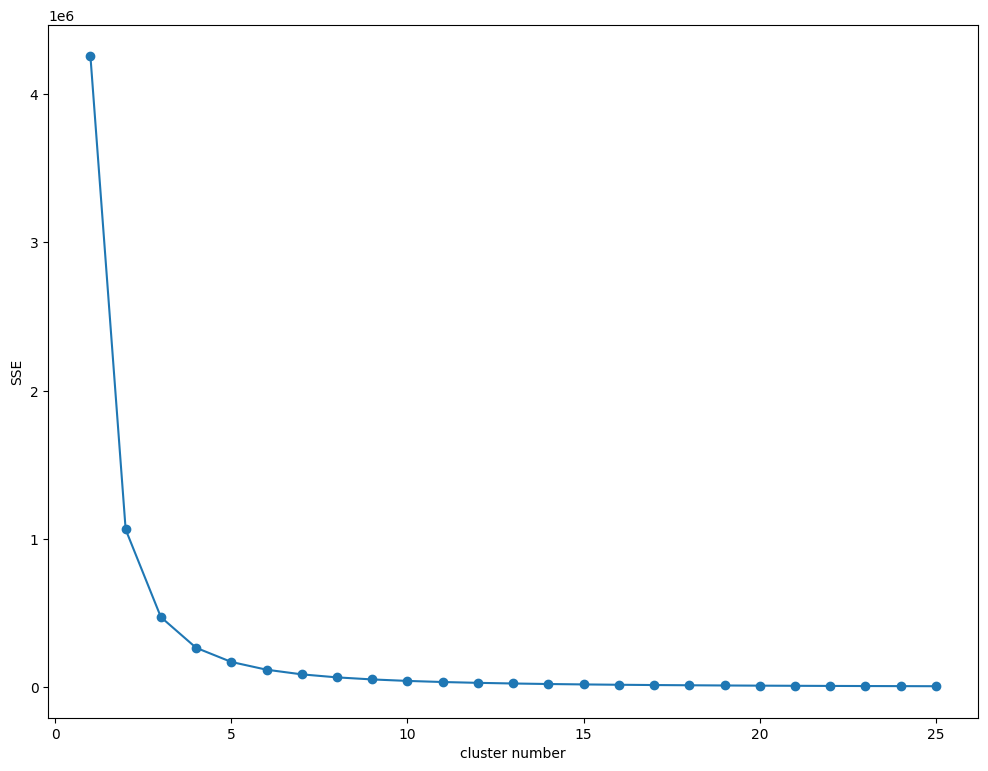

In [ ]:
def elbow(X,n) :
  sse = []
  for i in range(1,n+1) :
    km = KMeans(n_clusters=i)
    km.fit(X)
    sse.append(km.inertia_)

  plt.figure(figsize=(12,9))
  plt.plot(range(1,n+1), sse, marker='o')
  plt.xlabel('cluster number')
  plt.ylabel('SSE')
  plt.show()

elbow(df,25)

###군집점 생성과 시각화
- 택배 위치 데이터가 저장된 X에서 군집점을 랜덤으로 골라 C_x와 C_y 변수에 저장
- 택배 데이터에서 군집점을 고르지 않을 경우 터무니없는 숫자가 나와 군집점이 너무 멀거나 표시하기 힘든 군집점이 생성될 수 있어 X 데이터 내에서 선정
- zip( ) 함수를 이용하여 5개의 위도, 경도로 이루어진 임의의 군집점 데이터를 엮어 준다


In [ ]:
k = 5
C_x = np.random.choice(X[: , 0], k)
C_y = np.random.choice(X[: , 1], k)
C = np.array(list(zip(C_x, C_y)))
print(C)

[[ 37.335163 126.849625]
 [ 37.511324 126.849625]
 [ 37.346168 126.733799]
 [ 37.330061 126.664724]
 [ 37.391799 126.68061 ]]


- 5개의 군집점과 택배 위치 데이터를 시각화
- plt.legend( ) 함수 안에 loc =‘best’를 넣어주면 최적의 위치에 범례가 표시
- plt.grid( ) 함수로 보조선을 생성


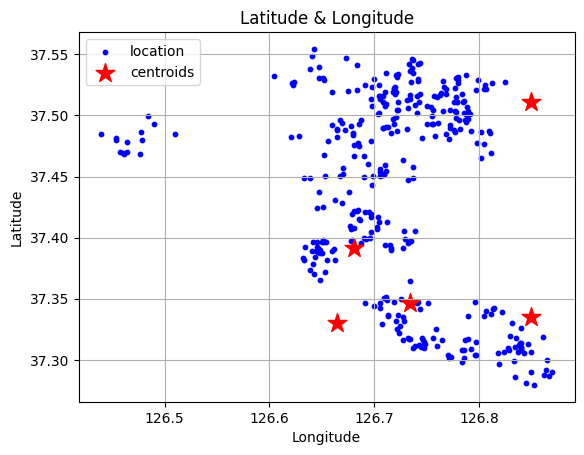

In [ ]:
lat = df['Latitude']
lon = df['Longitude']
plt.title('Latitude & Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(lon, lat, c='blue', s=10, label='location')
plt.scatter(C_y, C_x, marker='*', s=200, c='red', label='centroids')
plt.legend(loc='best')
plt.grid()
plt.show()

###초기 설정하기
- k-Means의 과정은 모든 데이터의 거리를 계산하여 가까운 군집에 그룹을 할당하고 각 군집에 속한 데이터의 평균을 계산하여 군집의 중심을 갱신하기 때문에 거리를 구하는 함수를 설정
- 거리 함수는 유클리드 거리 공식을 이용


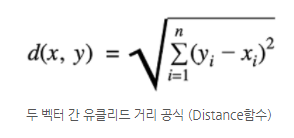

In [ ]:
def distance(A,B) :
  return np.sqrt(np.sum(np.power((A-B),2)))

- C_old는 군집점 5개를 담고 있는 배열과 크기가 같은 영행렬이고 군집점을 갱신할 때마다 이전 군집점 좌표를 저장
- clusters는 전체 좌표 데이터와 크기가 같은 영행렬, flag는 군집점들과 이전 군집점들과의 거리를 저장


In [ ]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = distance(C, C_old)
print(C_old)
print(flag)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
295.4078805017827


군집을 통해 섬과 바다를 고려하기 힘들기 때문에 아래의 코드처럼 영종도에 해당하는 좌표 1개를 군집점으로 설정하고 나머지 4개를 랜덤으로 설정하면 최적화에 도움이 된다.


In [ ]:
C_island = (37.48, 126.4)
C_x = np.random.choice(X[:,0],k-1)
C_y = np.random.choice(X[:,1],k-1)
C = list(zip(C_x, C_y))
C.append(C_island)
C = np.array(C)
print(C)

[[ 37.52298  126.672357]
 [ 37.305844 126.753892]
 [ 37.389657 126.698147]
 [ 37.469849 126.73126 ]
 [ 37.48     126.4     ]]


###k-Means 실행하기
최적의 군집점이라면 군집점이 움직이지 않을 것이고 군집점들과 이전 군집점들 간의 거리가 0이 되므로 flag가 0이 될 때까지 k-Means를 반복하여 모든 좌표의 군집을 구해보자.


1) 모든 택배 좌표와 5개의 군집점까지의 거리를 구하기

2) 가장 가까운 군집점에 해당하는 군집으로 분류

3) 이 시점의 군집점들은 C_old에 저장

4) 분류된 군집에서 군집 내 좌표들의 중심을 다시 군집점 설정

5) 군집점이 갱신되었으므로 flag 또한 갱신되어 작업을 반복


In [ ]:
from copy import deepcopy

In [ ]:
distances = []
while flag != 0:
  for i in range(len(X)):
    for j in range(k) :
      temp = distance(X[i],C[j])
      distances.append(temp)
    cluster = np.argmin(distances)
    clusters[i] = cluster
    distances = []

  C_old = deepcopy(C)

  for i in range(k) :
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    for r in range(len(points)):
      C[i][0] = np.mean(points[r][0])
      C[i][1] = np.mean(points[r][1])

  flag = distance(C, C_old)

X[clusters==k,1]와 X[clusters==k,0]에 위치 데이터가 있으며 k가 0~4까지 속해 있는 군집을 의미한다. 이들은 색깔(red, yellow, green, pink, blue)을 다르게 하여 표시

<ipython-input-32-7b8068772690>:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[clusters==1,1], X[clusters==1,0],s=50,c='yellow',marker='x',edgecolor = 'black',label='B')


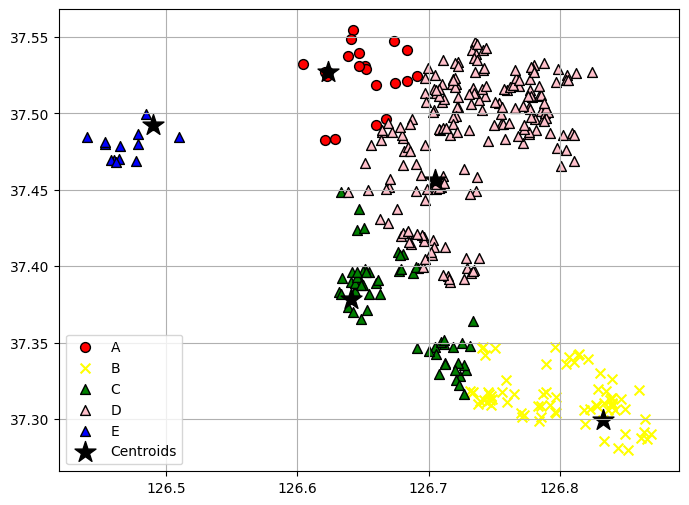

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[clusters==0,1], X[clusters==0,0],s=50,c='red',marker='o',edgecolor = 'black',label='A')
plt.scatter(X[clusters==1,1], X[clusters==1,0],s=50,c='yellow',marker='x',edgecolor = 'black',label='B')
plt.scatter(X[clusters==2,1], X[clusters==2,0],s=50,c='green',marker='^',edgecolor = 'black',label='C')
plt.scatter(X[clusters==3,1], X[clusters==3,0],s=50,c='pink',marker='^',edgecolor = 'black',label='D')
plt.scatter(X[clusters==4,1], X[clusters==4,0],s=50,c='blue',marker='^',edgecolor = 'black',label='E')
plt.scatter(C[:,1],C[:,0],s=250,marker='*',c='black',edgecolor='black',label='Centroids')
plt.legend()
plt.grid()
plt.show()

###지도에 표시하기

- k-Means 알고리즘을 통해 인천 연안 택배 위치 데이터를 군집화하였지만 단순 그래프로는 실제 무엇을 했는지 감이 잘 오지 않는다. 
- 파이썬의 지도 시각화 라이브러리인 folium 모듈을 활용해서 군집 결과를 지도에 표시


In [ ]:
!pip install folium
import folium as gm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
g_map = gm.Map(location=[37.428531, 126.596539], zoom_start=12)
g_map

지도에 택배 위치 데이터 표시하기
- m_color 변수 안에 다섯 가지 색깔을 미리 넣어 두기
- CircleMarker( ) 함수는 지도에 원으로 위치를 표시해
- X[cluster==i,0][ j]는 i에 해당하는 군집의 위도, X[cluster==i,1][ j]는 경도, radius는 반지름


In [ ]:
m_color = ['blue', 'red', 'green', 'purple', 'orange']

In [ ]:
for i in range(k):
  for j in range(len(X[clusters==i,1])):
    marker = gm.CircleMarker([X[clusters==i,0][j], X[clusters==i,1][j]], radius=3,color=m_color[i]        )
    marker.add_to(g_map)
    
g_map

군집점과 군집 영역을 표시하기
- Marker( ) 함수에 군집점이 저장되어 있는 C의 위도와 경도를 입력, popup으로 이름을 표시 
- 군집점의 아이콘은 별(star), 색은 검정(black)으로 표시
- 위도, 경도를 군집점으로 설정해 주고 반지름을 150으로 크게 설정


In [ ]:
for i in range(len(C)):
  marker = gm.Marker([C[i][0], C[i][1]], popup='kMeans Point', icon=gm.Icon(icon='star',color='black'))
  marker.add_to(g_map)

g_map

In [ ]:
for i in range(len(C)):
  marker = gm.CircleMarker([C[i][0], C[i][1]], radius=150, popup='kMeans Area', color=m_color[i], fill_color=m_color[i])
  marker.add_to(g_map)

g_map

In [ ]:
g_map.save('kMeans.html')